# **Text Mining via NLP: A Data Science Approach towards Spam Text Classification for COVID-19.**

> This study embarks on a data-driven journey, a quest to harness the power of NLP and data science for a noble cause – classifying text messages related to COVID-19 as spam or legitimate.
---
> **The goal is clear:** to build a robust system that can automatically sift through the digital noise and identify fraudulent and malicious content, ensuring that trusted information prevails in times of crisis.
---

> **Implementation:** Creating a workflow diagram for **"Text Mining via NLP: A Data Science Approach to Spam Text Classification for COVID-19"** can help visualize the step-by-step process involved in the project. Below is a simplified workflow diagram outlining the key stages and steps:

---
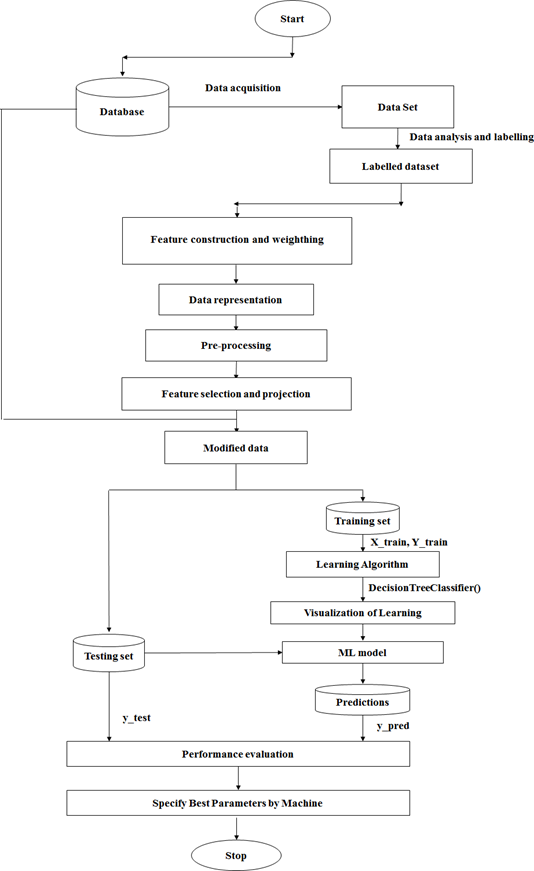

> **Figure - Work-flowchart of 'Text Mining via NLP: A Data Science Approach towards Spam Text Classification for COVID-19'.**








# **1) Import packages**


---



In [48]:
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. sms.csv)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB

# **2) Load the Dataset**


---



In [49]:
# replace with your code
import csv
from google.colab import files
uploaded = files.upload()

Saving uksms.csv to uksms (1).csv


**Show the data head**


---

In [50]:
data=pd.read_csv('uksms.csv')
data.head()

,type,text
0,spam,GOV UK CORONAVIRUS ALERT New rules in force no...
1,spam,We would like to inform you that you have been...
2,spam,NHS We have identified that you are eligible t...
3,spam,"Recharging succeeded, The recharged amount is ..."
4,spam,Your balance is finished. Dial *123*007* To ge...


In [51]:
print(len(data))

600


**Rename Columns**






In [52]:
data = data.rename(columns = {'type':'class_label','text':'message'})

**Head of dataset after edit column name**






In [53]:
data.head()

,class_label,message
0,spam,GOV UK CORONAVIRUS ALERT New rules in force no...
1,spam,We would like to inform you that you have been...
2,spam,NHS We have identified that you are eligible t...
3,spam,"Recharging succeeded, The recharged amount is ..."
4,spam,Your balance is finished. Dial *123*007* To ge...


**Information summary of sms dataset**

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class_label  600 non-null    object
 1   message      600 non-null    object
dtypes: object(2)
memory usage: 9.5+ KB


# **3) Exploratory Data Analysis**


---




> **Exploratory data analysis is an approach to -**


*   analyze the data sets
*   summarize their main characteristics
*   describe the method of data visualization using graphical representation





In [55]:
data.groupby('class_label').describe()

message                                                            \
              count unique                                                top   
class_label                                                                     
ham             458    310                                      I am fine too   
spam            142    112  Priyo Grahok,apnar bortoman offerti agamikal r...   

                  
            freq  
class_label       
ham            4  
spam           4

**Normalize data analysis**

In [56]:
data.class_label.value_counts(normalize=True)

ham     0.763333
spam    0.236667
Name: class_label, dtype: float64

**Pie chart and Plotbar**

> **A pie chart** (or a circle chart) is a **circular statistical graphic**, which is divided into slices to illustrate numerical proportion.

**The main purpose of the pie chart is -**

*   to show part-whole relationships of the data
*   to represent the normalized structure of the data

> **A plot bar** is a plot that **represents categorical data** with rectangular bars with lengths proportional to the values that present in the data.

**The main purpose of the plot bar is -**


*   it shows comparisons among discrete categories
*   it also display the comparision of specific categories and measured value











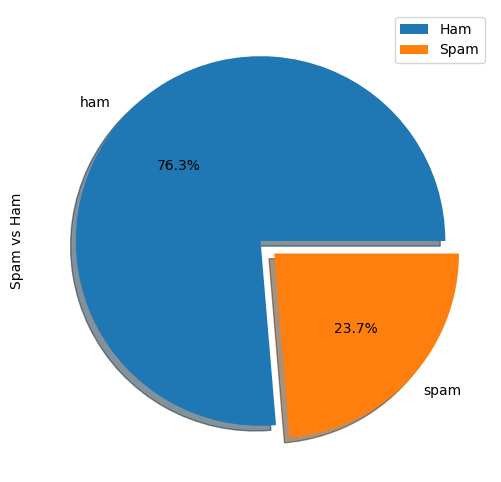

In [57]:
data["class_label"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

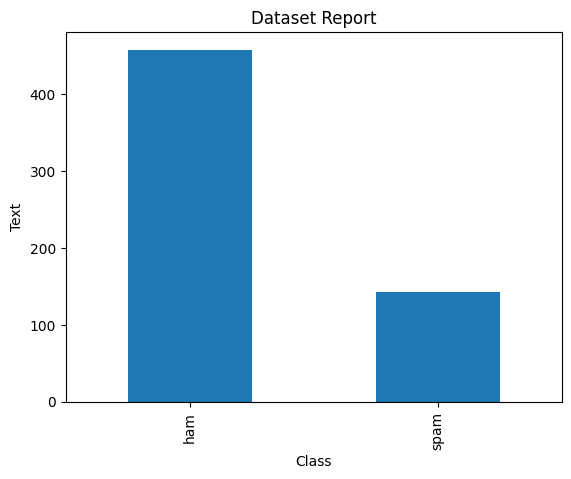

In [58]:
data.class_label.value_counts().plot.bar()
plt.title('Dataset Report')
plt.ylabel('Text')
plt.xlabel('Class')
plt.show()

# **3.1) Feature Engineering**


---




> **Feature engineering** is the process of **using domain knowledge to extract features from raw data.**

**The Goal of Feature Engineering -**


*   improve a model's predictive performance
*   reduce or add computational or data needs
*   improve interpretability of the results


In [59]:
data['length'] = data['message'].apply(len)
data.head()

,class_label,message,length
0,spam,GOV UK CORONAVIRUS ALERT New rules in force no...,148
1,spam,We would like to inform you that you have been...,281
2,spam,NHS We have identified that you are eligible t...,147
3,spam,"Recharging succeeded, The recharged amount is ...",152
4,spam,Your balance is finished. Dial *123*007* To ge...,60


In [60]:
data.length.describe()

count    600.000000
mean      56.801667
std       51.810838
min        3.000000
25%       24.000000
50%       37.000000
75%       66.250000
max      281.000000
Name: length, dtype: float64

**Histogram for Ham and Spam**
> **A histogram** is an approximate **representation of the distribution of numerical and categorical data.**

**Goals-**


*   displays the shape and spread of continuous sample data
*   graphical display of data using bars of different heights

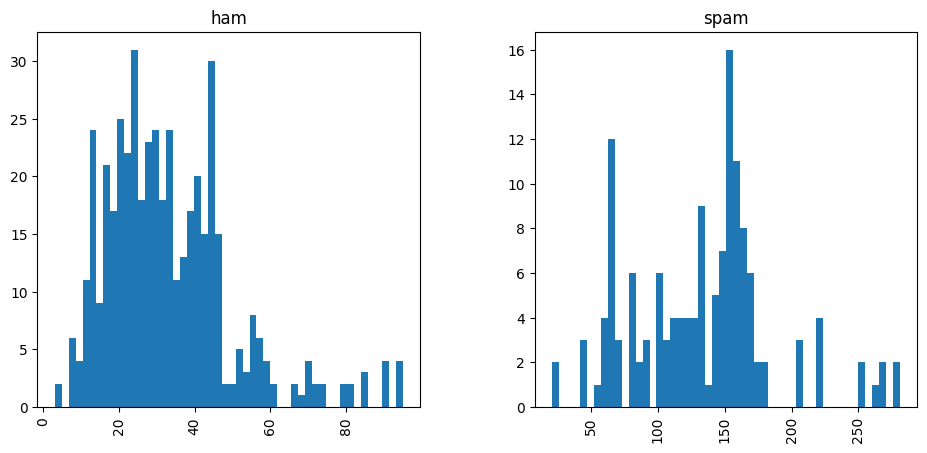

In [61]:
data.hist(column='length', by='class_label', bins=50,figsize=(11,5))
plt.show()

**Information summary of dataset after adding new Column**

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class_label  600 non-null    object
 1   message      600 non-null    object
 2   length       600 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 14.2+ KB


# **4) Preprocessing the data**

Data Preprocessing is that step in which the data gets transformed, or Encoded, to bring it to such a state that now the machine can easily parse it.

> Before start preprocessing we need to understand:=


>*   "Features" Also known as predictors, inputs, or attributes
*   "Response" Also known as the target, label, or output
*  "Observations" Also known as samples, instances, or records








In [63]:
import nltk
nltk.download('stopwords')

from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
corpus=[]
ps=PorterStemmer()
for i in range(0,len(data)):
  msg=re.sub('[^a-zA-Z]',' ', data['message'][i])
  msg.lower()
  sms=msg.split(' ')
  msg=[ps.stem(word) for word in sms if not word in set(stopwords.words('english'))]
  msg=' '.join(msg)
  corpus.append(msg)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **4.1) Representing text as numerical data**

We will use **CountVectorizer()** function from the Sk-learn library to easily implement the BoW model using Python, to "convert a text into its equivalent vector of numbers.":

**4 Steps for Vectorization**
* Import
* Instantiate
* Fit
* Transform

In [64]:
#using Bag Of Word
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(corpus).toarray()
X.shape


(600, 776)

**Representation of 'document-term matrix'**
> A document-term matrix or term-document matrix is a mathematical matrix that describes the frequency of terms that occur in a collection of documents.

**Here -**

* each row represents one document
* each column represents one term (word)
* each value (typically) contains the number of appearances of that term in that document




In [65]:
# examine the fitted feature names.
cv.get_feature_names_out()
#transform the data into a 'document-term matrix'
pd.DataFrame(X, columns=cv.get_feature_names_out())

,abl,abroad,abt,accept,accommod,accompani,account,actual,ad,add,...,ya,yahoo,ye,yeah,yesterday,yet,you,young,your,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
y=pd.get_dummies(data['class_label'])
y=y.iloc[:,1].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# **4.2) Feature Extraction for WordCloud**

> For feature extraction process, word_tokenizing approach is selected. Tokenization is a process which breaks up the input sentences into individual words or small units.


* Word clouds or tag clouds are graphical representations of word frequency that give greater prominence to words that appear more frequently in a source text.


In [67]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
spam_messages = data[data["class_label"] == "spam"]["message"]
ham_messages = data[data["class_label"] == "ham"]["message"]
spam_words = []
ham_words = []
# Since this is just classifying the message as spam or ham, we can use isalpha().
# This will also remove the not word in something like can't etc.
# In a sentiment analysis setting, its better to use
# sentence.translate(string.maketrans("", "", ), chars_to_remove)
def extractSpamWords(data):
  global spam_words
  words = [word.lower() for word in word_tokenize(data) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
  spam_words = spam_words + words
def extractHamWords(data):
  global ham_words
  words = [word.lower() for word in word_tokenize(data) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
  ham_words = ham_words + words
spam_messages.apply(extractSpamWords)
ham_messages.apply(extractHamWords)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


14     None
15     None
16     None
17     None
18     None
       ... 
592    None
593    None
597    None
598    None
599    None
Name: message, Length: 458, dtype: object

**4.2.1) Import wordcloud packages**

In [68]:
from wordcloud import WordCloud

**a) Spam Word Cloud**

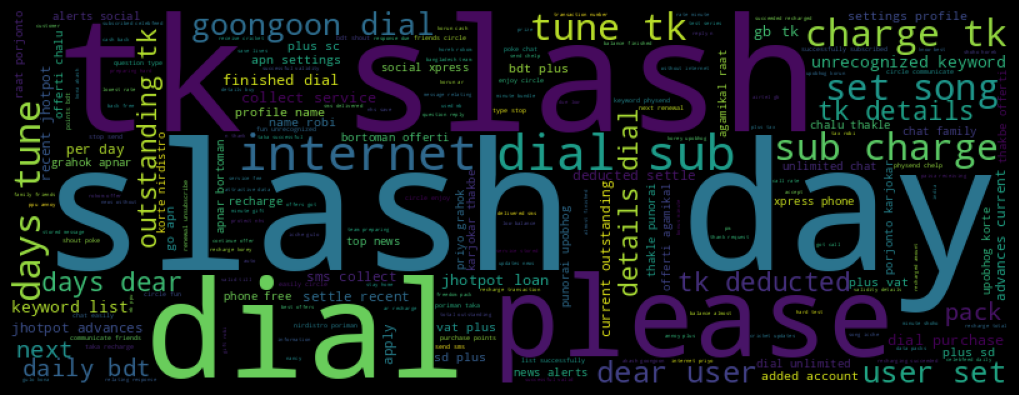

In [69]:
#Spam Word cloud
spam_wordcloud = WordCloud(width=800, height=300).generate(" ".join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

**b) Ham Word Cloud**

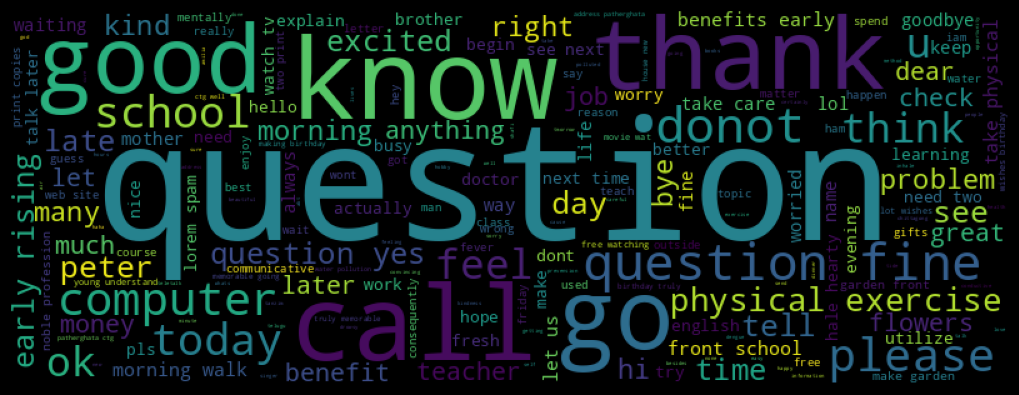

In [70]:
#Ham word cloud
ham_wordcloud = WordCloud(width=800, height=300).generate(" ".join(ham_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

**4.2.2) Chart of Top 10 used words for both ham and spam**


* our goal is to educate users about the configuration of the most used words in the dataset. This list and the use of words simply activate the ham and spam word filters.

* It is important to know because the list contains many basic words of marketing, operator services, operator promos and regular conversation through sms.



**a) Chart of Top 10 spam words.**

In [71]:
# Top 10 spam words
spam_words = np.array(spam_words)
print("Top 10 Spam words are :\n")
pd.Series(spam_words).value_counts().head(n = 10)


Top 10 Spam words are :



tk          89
dial        84
days        40
plus        33
slash       33
get         27
recharge    26
internet    24
dear        20
sms         19
dtype: int64

**b) Chart of Top 10 ham words.**

In [72]:
# Top 10 Ham words
ham_words = np.array(ham_words)
print("Top 10 Ham words are :\n")
pd.Series(ham_words).value_counts().head(n = 10)

Top 10 Ham words are :



question    90
know        23
fine        20
call        20
go          18
school      17
good        16
donot       14
morning     13
see         13
dtype: int64

# **4.3) Feature selection using SelectFromModel**


> The classes in the sklearn.feature_selection module can be used for feature selection/dimensionality reduction on sample sets, either to improve estimators’ accuracy scores or to boost their performance.

**The aim of Feature Selection is :=**
* Improves Accuracy
* Reduces Training Time
* Reduces Overfitting



In [73]:
"""from typing import Any
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif"""

from sklearn.feature_selection import SelectFromModel
m = SelectFromModel(MultinomialNB(alpha= 1)).fit(X,y)

print (X.shape)

(600, 776)


In [74]:
from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
#X, y = load_iris(return_X_y=True)
#X.shape

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape


(600, 141)

# **5) Train_Test_Split**


> The train-test split is a technique for evaluating the performance of a machine learning algorithm.
It can be used for classification or regression problems and can be used for any supervised
learning algorithm.




In [75]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test=train_test_split(X,y,test_size=0.2, random_state=2)

In [76]:
print(len(X_train))
print(len(X_test))

480
120


# **6) Building and evaluating a model**
**Import Evaluation metric**

In [77]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
#Or we can use direct library avaiable to get accuracy of the prediction.
from sklearn.metrics import accuracy_score

**Import tree**


> The goal is to create a model that predicts the value of a target variable by learning simple decision rules which is guessed from the data features.




In [78]:
from sklearn import tree

**Apply DecisionTreeClassifier**


> Decision trees classify the examples by sorting them down the tree from the root to some leaf node, with the leaf node providing the classification information of the example .

**Goals :**
* build a model (m)
* train it for export the text (classification information)





[Text(0.875, 0.9666666666666667, 'x[170] <= 0.5\ngini = 0.362\nsamples = 480\nvalue = [366, 114]'),
 Text(0.8125, 0.9, 'x[299] <= 0.5\ngini = 0.236\nsamples = 424\nvalue = [366, 58]'),
 Text(0.75, 0.8333333333333334, 'x[577] <= 0.5\ngini = 0.202\nsamples = 413\nvalue = [366, 47]'),
 Text(0.6875, 0.7666666666666667, 'x[529] <= 0.5\ngini = 0.163\nsamples = 402\nvalue = [366, 36]'),
 Text(0.625, 0.7, 'x[112] <= 0.5\ngini = 0.124\nsamples = 392\nvalue = [366, 26]'),
 Text(0.5625, 0.6333333333333333, 'x[479] <= 0.5\ngini = 0.089\nsamples = 384\nvalue = [366, 18]'),
 Text(0.5, 0.5666666666666667, 'x[421] <= 0.5\ngini = 0.071\nsamples = 380\nvalue = [366, 14]'),
 Text(0.4375, 0.5, 'x[319] <= 1.0\ngini = 0.052\nsamples = 376\nvalue = [366, 10]'),
 Text(0.375, 0.43333333333333335, 'x[151] <= 0.5\ngini = 0.037\nsamples = 373\nvalue = [366, 7]'),
 Text(0.3125, 0.36666666666666664, 'x[208] <= 0.5\ngini = 0.027\nsamples = 371\nvalue = [366, 5]'),
 Text(0.25, 0.3, 'x[676] <= 0.5\ngini = 0.016\nsampl

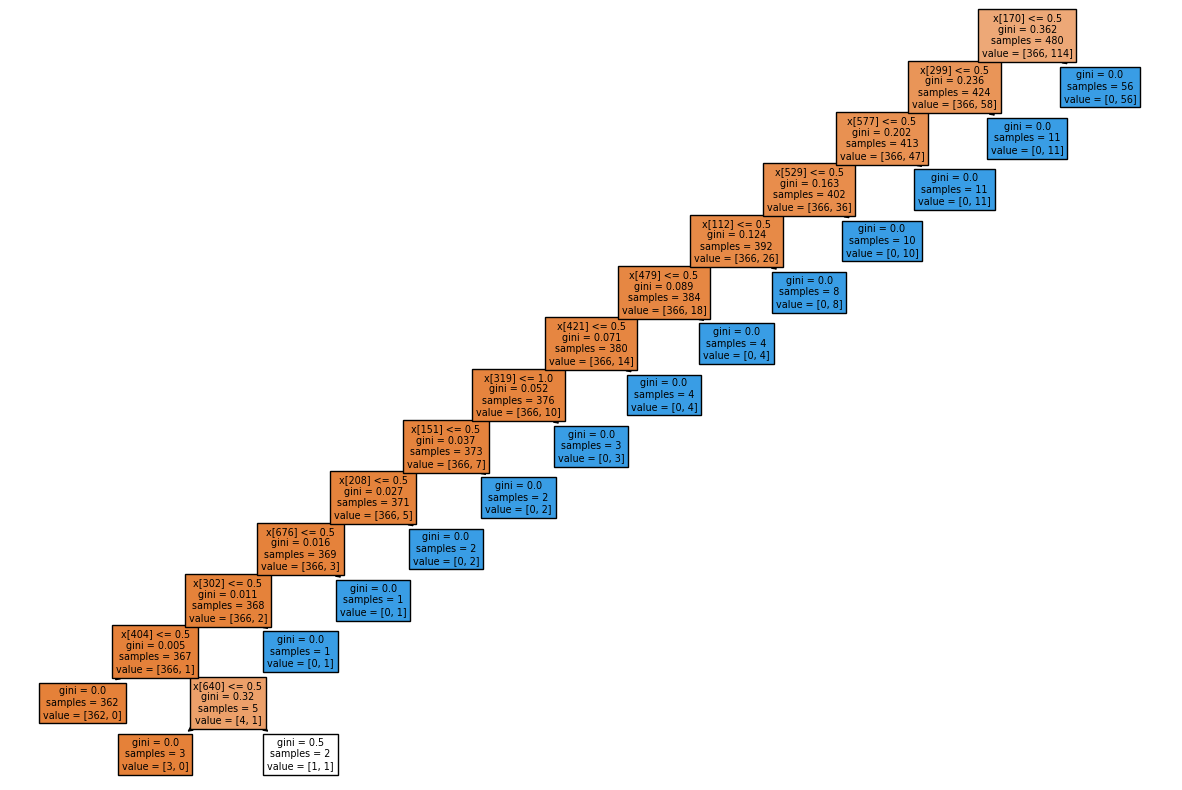

In [79]:
from sklearn.tree import DecisionTreeClassifier
X_new = tree. DecisionTreeClassifier()
X_new.fit(X_train, y_train)
plt.figure(figsize=(15,10))
tree.plot_tree(X_new, filled=True )

**Sklearn export_text gives an explainable view of the decision tree over a feature**

In [80]:
print(tree.export_text(X_new))


|--- feature_170 <= 0.50
|   |--- feature_299 <= 0.50
|   |   |--- feature_577 <= 0.50
|   |   |   |--- feature_529 <= 0.50
|   |   |   |   |--- feature_112 <= 0.50
|   |   |   |   |   |--- feature_479 <= 0.50
|   |   |   |   |   |   |--- feature_421 <= 0.50
|   |   |   |   |   |   |   |--- feature_319 <= 1.00
|   |   |   |   |   |   |   |   |--- feature_151 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_208 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_676 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- feature_676 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_208 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_151 >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_319 >  1.00
|   |   |   |   |   |   |   | 

# **6.1) Naive Bayes Classification (NB)**


> **The reasons behind choosing Naïve Bayes for classification:** It is vital for us to settle on an honest at an equivalent time effective algorithm for build an efficient model.


---


**Advantages of NB:**
* Low computation cost.
* It can effectively work with large datasets.
* for little sample sizes, Naive Bayes can outperform the foremost powerful alternatives.
* Easy to implement, fast and accurate method of prediction.
* Can work with multiclass prediction problems.
* It performs well in text classification problems.



In [81]:
# Model Selection Naive Bayes
from sklearn.naive_bayes import MultinomialNB
#Instantiate a Multinomial Naive Bayes model and train the model.
nb_mod = MultinomialNB(alpha=1).fit(X_train,y_train)

In [82]:
# calculate predicted probabilities for X_test
#make class predictions for X_test
y_pred_nb=nb_mod.predict(X_test)
y_pred_nb

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=uint8)

**NB_Classification_Report**

In [83]:
print('Naive Bayes')
print("F1 Score :",f1_score(y_pred_nb,y_test,average = "weighted"))
print('Report:\n',classification_report(y_test, y_pred_nb))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred_nb))
#Timing it with an Python "magic command"
print('\t')

print('Time taken to train model on train split:')
%time nb_mod = MultinomialNB().fit(X_train,y_train)
print('\t')
print('Time taken to test model on test split:')
%time y_pred_nb=nb_mod.predict(X_test)
print('\t')
print('Accuracyscore of Naive Bayes:',accuracy_score(y_test, y_pred_nb))

Naive Bayes
F1 Score : 0.9917199017199018
Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        92
           1       1.00      0.96      0.98        28

    accuracy                           0.99       120
   macro avg       0.99      0.98      0.99       120
weighted avg       0.99      0.99      0.99       120

Confusion Matrix: 
 [[92  0]
 [ 1 27]]
	
Time taken to train model on train split:
CPU times: user 4.36 ms, sys: 8 µs, total: 4.36 ms
Wall time: 4.31 ms
	
Time taken to test model on test split:
CPU times: user 972 µs, sys: 1.2 ms, total: 2.17 ms
Wall time: 1.94 ms
	
Accuracyscore of Naive Bayes: 0.9916666666666667


**NB_ROC_Curve**


> An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds.

**This curve plots two parameters:**
* True Positive Rate.
* False Positive Rate.



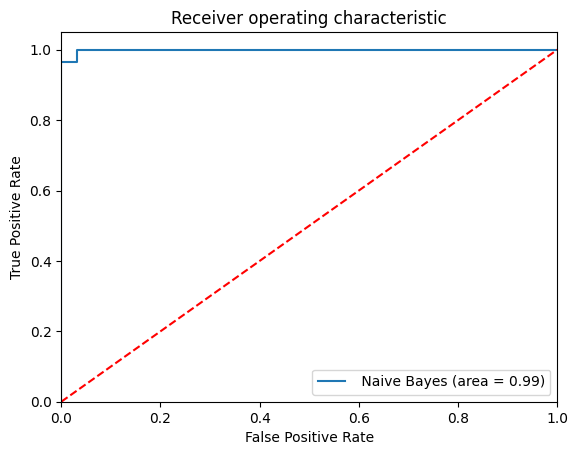

In [84]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
nb = accuracy_score(y_test, y_pred_nb)
nb_roc_auc = roc_auc_score(y_test, nb_mod.predict_proba(X_test)[: ,1])
fpr, tpr, thresholds = roc_curve(y_test, nb_mod.predict_proba(X_test)[:,1])
# print(thresholds)
plt.figure()
plt.plot(fpr, tpr, label=' Naive Bayes (area = %0.2f)' % nb )
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


# **6.2) Support Vector Machine (SVM)**


> **The reasons behind choosing SVM for classification:** It is effective in high dimensional spaces and it is also effective in cases where the number of dimensions is greater than the number of samples.


---


**Advantages of SVM :=**
* SVM’s are excellent once we haven't any idea on the info.
* Works well with even unstructured and semi structured data like text, Images and trees.
* The kernel trick is real strength of SVM. With an appropriate kernel function, we will solve any complex
problem.

In [85]:
from sklearn.svm import SVC
svm_mod = SVC(C=1).fit(X_train, y_train)
# calculate predicted probabilities for X_test
y_pred_svm = svm_mod.predict(X_test)
y_pred_svm

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=uint8)

**SVM_Classification_Report**

In [86]:
print("SVM")
print("F1 Score :",f1_score(y_pred_svm,y_test,average = "weighted"))
print('Report:\n',classification_report(y_test, y_pred_svm))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred_svm))
print('\t')
print('Time taken to train the model on train split')
%time svm_mod = SVC().fit(X_train, y_train)
print('\t')
print('Time taken to test model on test split:')
%time y_pred_svm = svm_mod.predict(X_test)
print('\t')
print('Accuracyscore of SVM:',accuracy_score(y_test, y_pred_svm))

SVM
F1 Score : 0.9917199017199018
Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        92
           1       1.00      0.96      0.98        28

    accuracy                           0.99       120
   macro avg       0.99      0.98      0.99       120
weighted avg       0.99      0.99      0.99       120

Confusion Matrix: 
 [[92  0]
 [ 1 27]]
	
Time taken to train the model on train split
CPU times: user 24.5 ms, sys: 729 µs, total: 25.2 ms
Wall time: 24.7 ms
	
Time taken to test model on test split:
CPU times: user 11.2 ms, sys: 0 ns, total: 11.2 ms
Wall time: 10.9 ms
	
Accuracyscore of SVM: 0.9916666666666667


**SVM_ROC_Curve**

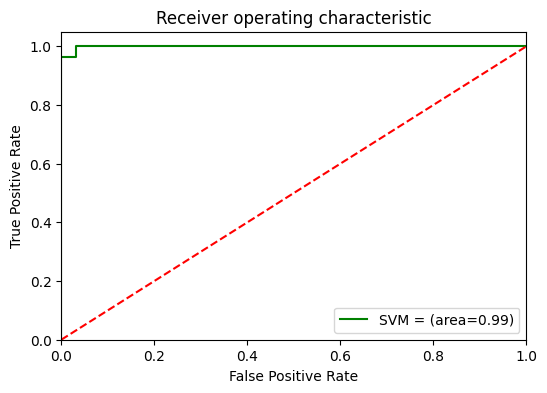

In [87]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
svm=accuracy_score(y_test, y_pred_svm)
plt.figure(figsize=(6,4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, color='green',label = 'SVM = (area=%0.2f)' % svm)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# **6.3) Logistic Regression**

> **The reason behind using the Linear Regression for classification:** is that the appropriate multivariate analysis to conduct a efficient model.


---


**Advantages of LR:**


*  It can easily reach multiple classes (multinomial regression) and a natural probabilistic view of sophistication predictions.
*   Logistic regression is simpler to implement, interpret, and really efficient to coach.
*   It not only provides a measure of how appropriate a predictor (coefficient size) is, but also its direction of association (positive or negative).
*   It can interpret model coefficients as indicators of feature importance.









In [88]:
from sklearn.linear_model import LogisticRegression
logreg_mod = LogisticRegression(C=1).fit(X_train, y_train)

In [89]:
# calculate predicted probabilities for X_test
y_pred_logreg = logreg_mod.predict(X_test)
y_pred_logreg

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=uint8)

**Logistic Regression_Classification_Report**

In [90]:
print("Logistic Regression")
print("F1 Score :",f1_score(y_pred_logreg,y_test,average = "weighted"))
print('Report:\n',classification_report(y_test, y_pred_logreg))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred_logreg))
print('\t')
print('Time taken to train the model on train split')
%time logreg_mod = LogisticRegression(random_state=42).fit(X_train, y_train)
print('\t')
print('Time taken to test model on test split:')
%time y_pred_logreg = logreg_mod.predict(X_test)
print('\t')
print('Accuracyscore of Logistic Regression:',accuracy_score(y_test, y_pred_logreg))

Logistic Regression
F1 Score : 0.9917199017199018
Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        92
           1       1.00      0.96      0.98        28

    accuracy                           0.99       120
   macro avg       0.99      0.98      0.99       120
weighted avg       0.99      0.99      0.99       120

Confusion Matrix: 
 [[92  0]
 [ 1 27]]
	
Time taken to train the model on train split
CPU times: user 27.8 ms, sys: 8.4 ms, total: 36.2 ms
Wall time: 18.6 ms
	
Time taken to test model on test split:
CPU times: user 2.89 ms, sys: 210 µs, total: 3.1 ms
Wall time: 1.95 ms
	
Accuracyscore of Logistic Regression: 0.9916666666666667


**Logistic Reg_ROC_Curve**

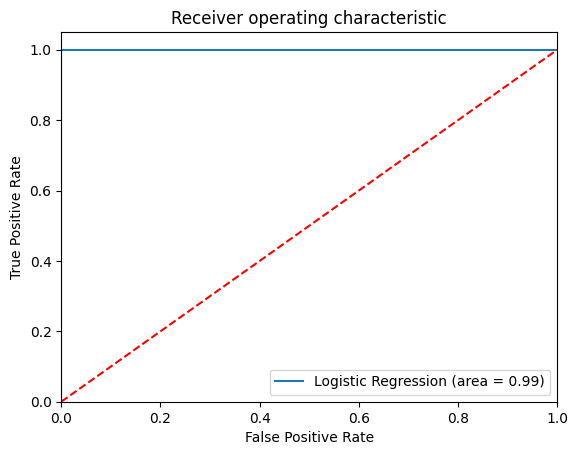

In [91]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
logistic_reg = accuracy_score(y_test, y_pred_logreg)
logit_roc_auc = roc_auc_score(y_test, logreg_mod.predict_proba(X_test)[: ,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg_mod.predict_proba(X_test)[:,1])
# print(thresholds)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logistic_reg)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


# **7) Predicted Model Analysis**
> Overall predicted model analytical view for comparative methods.



In [92]:
#Or we can use direct library avaiable to get accuracy of the prediction.
print("Naive Bayes Model_Accuracy:",accuracy_score(y_test, y_pred_nb))
print("SVM Model_Accuracy:",accuracy_score(y_test, y_pred_svm))
print("Logistic Regression Model_Accuracy:",accuracy_score(y_test, y_pred_logreg))

Naive Bayes Model_Accuracy: 0.9916666666666667
SVM Model_Accuracy: 0.9916666666666667
Logistic Regression Model_Accuracy: 0.9916666666666667



---

**k - fold Cross- Validation**


> K-fold cross-validation is an important technique in machine learning and model evaluation for several reasons, which are outlined in the following bullet points:
* **Reduces overfitting:** Cross-validation helps identify whether a model is overfitting or underfitting the data. If a model performs well on one fold but poorly on another, it may be overfitting the training data.
* **Generalization assessment:** K-fold cross-validation provides a more realistic estimate of how well a model will generalize to unseen data because it evaluates the performance of multiple diverse subsets of the dataset.
* **Model selection:** It helps to compare different models. By applying the same cross-validation method to multiple models, you can choose one that performs consistently well across folds.


In [93]:
#import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.99166667, 0.98333333, 0.96666667, 1.        , 1.        ])

In [94]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.99 accuracy with a standard deviation of 0.01



# **8) Observations**
We are observing that 5-fold cross-validation is showing an accuracy of **1.00-0.99%**, while Naive Bayes, Support Vector Machine (SVM), and Logistic Regression are individually showing **0.99%** accuracy, which is quite similar.

If the result of k-fold cross validation differs from other predictive models, it suggests a few things:

* **Cross-Validation Variability:** Cross-validation results typically provide a more robust estimate of a model's performance because they assess the model's performance on different subsets of the data. The 0.96% accuracy from cross-validation might be slightly lower due to the variability introduced by the different folds.

* **Overfitting:** One possible explanation is that one or more of the individual models (Naive Bayes, SVM, or Logistic Regression) might be overfitting the training data. Overfit models tend to perform exceptionally well on the training data but may not generalize as well to unseen data. Cross-validation is less prone to overfitting because it evaluates the model's performance on multiple subsets of the data.

* **Data Quality:** Cross-validation can reveal issues related to data quality or noise that may not be as evident when evaluating a single model run. If there are inconsistencies or outliers in the data, cross-validation might result in a lower accuracy estimate.



It's also worth noting that a **0.01%** or **0.03%** difference in accuracy may not be substantial, and the choice of the best model should take into account other factors like interpretability, computational resources, and the specific goals of your project.



---



#**9) Summary**

Machine learning model selection is a multi-faceted process that should consider a combination of factors, including accuracy, interpretability, computational resources, and alignment with project goals. A small difference in accuracy should not be the sole determinant of model choice, as other considerations play a significant role in the success of a machine learning project.


---

